# 주제: GDP와 다른 지표들과의 관계

## 데이터의 출처는? 기획재정부에 OECD(34개국) 기준 엑셀로 정리된 파일들

## 먼저 한 일들? 우선 데이터를 살펴보았다. X, Y를 무엇으로 둘 것인가?

### 경제성장률은 전년도와 올해와의 차이라서 다른 값들과 맞추기가 어려웠다. 그래서 GDP로 변경

<img src="http://study.zumst.com/upload/00-C33-00-95-18/%EC%BD%98%ED%85%90%EC%B8%A0%20%EC%88%98%EC%A0%95%20%EC%97%94%ED%8A%B8%EB%A6%AC%20245.jpg" style="width:50%; margin: 0 auto 0 auto;">

In [1]:
GDP = pd.read_excel("./1인당 GDP(명목)(2015).xlsx")
GDP.head()

,1.1.1. 1인당 GDP(명목),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,(US $),2000.000000,2001.000000,2002.000000,2003.000000,2004.000000,2005.000000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2014 순위
1,Australia,21666.951681,19496.638711,20062.221141,23445.186760,30449.619647,33995.851673,36100.558522,40976.452193,49650.417536,42702.198279,51801.048949,62133.610783,67511.824963,67473.033796,61886.958785,4
2,Austria,24517.265146,24489.737757,26351.381499,32102.926383,36693.399582,38242.050075,40430.993614,46586.648603,51386.378411,47654.193870,46593.389217,51130.969046,48348.225963,50513.385418,51127.076156,11
3,Belgium,23151.953744,23078.418060,25006.791355,30702.513492,35547.535864,36927.999078,38936.330908,44449.689060,48561.356399,44999.201581,44360.901687,47801.596905,44818.045053,46927.248978,47516.521136,15
4,Canada,24031.951202,23573.750065,23995.016327,28026.006013,31830.011871,36028.232490,40243.552284,44328.475377,46400.441846,40764.141347,47463.631192,52086.533525,52733.473689,52305.258394,50271.074871,12


#### 보는 바와 같이 데이터 전처리가 필요하다. y값을 GDP로 두고 나머지 지표들을 X값으로 두기 위해서는 년도와 국가를 모두 제거(표준화)하기로 했다.

In [2]:
GDP = GDP.drop("Unnamed: 16", axis=1)   #필요없는 row와 column을 제거
GDP.columns = ['국가', '2000', '2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014'] #column명 지정
GDP.drop(GDP.index[[0]], inplace=True)   #년도 제거
GDP = GDP.drop("국가", axis=1)   #국가명 제거
GDP

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,21666.951681,19496.638711,20062.221141,23445.186760,30449.619647,33995.851673,36100.558522,40976.452193,49650.417536,42702.198279,51801.048949,62133.610783,67511.824963,67473.033796,61886.958785
2,24517.265146,24489.737757,26351.381499,32102.926383,36693.399582,38242.050075,40430.993614,46586.648603,51386.378411,47654.193870,46593.389217,51130.969046,48348.225963,50513.385418,51127.076156
3,23151.953744,23078.418060,25006.791355,30702.513492,35547.535864,36927.999078,38936.330908,44449.689060,48561.356399,44999.201581,44360.901687,47801.596905,44818.045053,46927.248978,47516.521136
4,24031.951202,23573.750065,23995.016327,28026.006013,31830.011871,36028.232490,40243.552284,44328.475377,46400.441846,40764.141347,47463.631192,52086.533525,52733.473689,52305.258394,50271.074871
5,5229.177098,4709.923400,4566.523326,4948.748180,6323.757640,7728.611897,9500.835162,10513.540709,10791.020185,10217.314026,12785.051875,14582.170519,15253.330826,15741.711658,14528.325811
6,5994.528277,6594.717465,8011.898074,9741.058384,11667.632120,13317.729834,15159.141146,18333.945900,22649.379340,19698.492091,19763.963798,21656.397641,19670.402615,19858.343464,19553.929945
7,30743.559174,30751.649460,33228.692909,40458.770640,46487.514911,48816.835864,52041.002973,58501.138316,64181.994665,57895.501225,57647.668762,61304.061205,57636.125310,59818.631528,60634.394272
8,4069.853821,4490.659030,5298.623213,7165.689909,8849.319109,10336.389551,12591.958991,16580.997042,18087.678657,14718.339589,14632.082206,17177.480298,17132.227289,18877.330493,19719.843879
9,24253.250425,24913.244516,26834.026250,32816.160880,37636.111734,38969.171632,41120.676506,48288.549098,53401.314873,47107.155709,46205.166011,50787.564983,47415.559871,49310.229223,49541.288221
10,22465.641841,22527.317751,24275.242603,29691.181584,33874.742548,34879.726329,36544.508534,41600.583975,45413.065712,41631.131412,40705.766230,43807.475903,40850.352373,42627.652439,42732.566503


#### DataFrame 안에 있는 데이터를 어떻게 꺼낼 수 있을까?          답은 np.array로 형태를 바꾸면 된다.

In [3]:
y = np.array(GDP).flatten()   #y값에다가 행렬에서 벡터화로 변수 지정
y.shape

(510,)

### 이제는 X값으로 여러 지표들을 함수로 만들어보자. Y값은 GDP, X값은 총 23개

In [4]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import Imputer   #나중에 Imputation 하기 위해서 

def relate_to_gdp():
    
    GDP = pd.read_excel("./1인당 GDP(명목)(2015).xlsx")   #먼저 GDP 변수에다가 데이터 저장
    GDP = GDP.drop("Unnamed: 16", axis=1)
    GDP.columns = ['국가', '2000', '2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']
    GDP.drop(GDP.index[[0]], inplace=True)
    GDP = GDP.drop("국가", axis=1)
    indicator = input()
    
    df1 = pd.read_excel("./{indic}.xlsx".format(indic=indicator))   #df1에다가 x데이터를 DataFrame 형식으로 저장
    
    if len(df1.columns) > 17:   #2015년까지 있는 X 데이터의 경우
        df1 = df1.drop("Unnamed: 17", axis=1).drop("Unnamed: 16", axis=1)
        df1.columns = ['국가', '2000', '2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']
    elif len(df1.columns) == 17:  #2014년까지 있는 X 데이터의 경우
        df1 = df1.drop("Unnamed: 16", axis=1)
        df1.columns = ['국가', '2000', '2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']
    elif len(df1.columns) == 16:   #2013년까지 있는 X 데이터의 경우
        df1 = df1.drop("Unnamed: 15", axis=1)
        df1.columns = ['국가', '2000', '2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']
        GDP = GDP.drop("2014", axis=1)
    elif len(df1.columns) == 15:   #2012년까지 있는 X 데이터의 경우
        df1 = df1.drop("Unnamed: 14", axis=1)
        df1.columns = ['국가', '2000', '2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']
        GDP = GDP.drop("2014", axis=1).drop("2013", axis=1)
        
    
    
    for i in range(1, 3):   #X 데이터 상단에 있는 row를 제거
        if df1.ix[i][0] == 'Australia':
            if i == 2:
                df1.drop(df1.index[1], inplace=True)
                df1.drop(df1.index[0], inplace=True)
            else:
                df1.drop(df1.index[0], inplace=True)
                
    df1.drop("국가", axis=1, inplace=True)   #X 데이터 국가 column 제거(국가 표준화)
    
    x = np.array(df1)   #X 데이터에 ".."이라는 문자가 있는 데 이것은 전부 "NaN" 값으로 변경
    for i in range(34):
        for j in range(len(df1.columns)):
            if x[i][j] == "..":
                x[i][j] = "NaN"
                
    imp = Imputer(missing_values='NaN', strategy='mean', axis=1)   #변경된 "NaN"값을 imputation 처리
    x = imp.fit_transform(x)
    
    x = x.flatten()                         #regplot과 jointplot하기 위해서는 행렬 형태로 안 되어 벡터화 했음
    y = np.array(GDP).flatten()
    
    sns.regplot(x, y);
    sns.jointplot(x, y);
    model = sm.OLS(y, x)
    result = model.fit()
    print(result.summary())

### X값은 법인세율, 고용률, 노동생산성, 무역규모, 빈곤율, 산림면적, 서비스업 고용비중, 언론자유, 연평균 근로시간, 실업률, 청년층고용률, 부패지수, 유선 초고속 인터넷 가입건수, 컴퓨터 보유가구 비율, CO2 배출량, 빈곤율, 지니계수, R&D지출, 교육서비스 고용비중, 산림면적, 서비스업 고용비중, 제조업 고용비중, 조세부담률, 공무원수 비중, 범죄율

### 이 중 1개를 입력하시오.

지니계수
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     738.2
Date:                Fri, 15 Jul 2016   Prob (F-statistic):           3.14e-96
Time:                        16:26:19   Log-Likelihood:                -5072.9
No. Observations:                 442   AIC:                         1.015e+04
Df Residuals:                     441   BIC:                         1.015e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1          9.407e+04   3462.313     27.169    

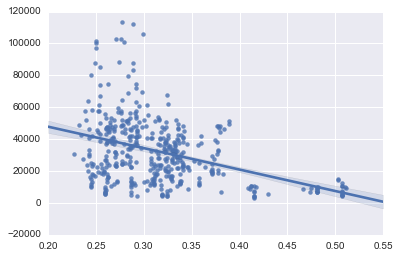

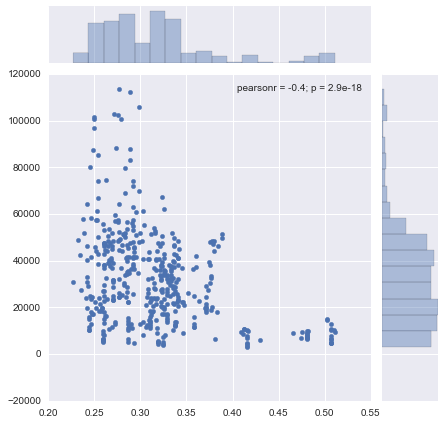

In [7]:
relate_to_gdp()